<a href="https://colab.research.google.com/github/ArthiyaD/TroubleShooters/blob/Development/Model2_of_ACG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/aashish-bidap/AI-based-Social-Media-Caption-Generator.git

Cloning into 'AI-based-Social-Media-Caption-Generator'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 63 (delta 28), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (63/63), 3.54 MiB | 3.69 MiB/s, done.


In [ ]:
/content/drive/My Drive/GoogleNews-vectors-negative300.bin.gz

In [ ]:
!pip install gensim==3.8.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.4/23.4 MB 40.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gensim: filename=gensim-3.8.3-cp39-cp39-linux_x86_64.whl size=26528010 sha256=2e95fae070b650770b7b2e18bc3e93d87a205dc35d9d927b101a6d01f4c41c28
  Stored in directory: /root/.cache/pip/wheels/ca/5d/af/618594ec2f28608c1d6ee7d2b7e95a3e9b06551e3b80a491d6
Successfully built gensim
  Attempting uninstall: gensim
    Found existing installation: gensim 4.3.1
    Uninstalling gensim-4.3.1:
      Successfully uninstalled gensim-4.3.1


In [ ]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import wordnet
from nltk.corpus import stopwords

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
data = pd.read_csv('/content/AI-based-Social-Media-Caption-Generator/merged_data_file.csv')
data.head(5)

,Unnamed: 0.1,Category,Description,Title,Unnamed: 0,Video Id,file
0,0,travel,DISCLAIMER* Please do not ride elephants when ...,Welcome to Bali | Travel Vlog | Priscilla Lee,0,i9E_Blai8vk,Collected_data_raw1.csv
1,1,travel,Had the most amazing experience in Finland for...,FINLAND VACATION: TRAVEL VLOG,1,UBvJKs9eW3I,Collected_data_raw1.csv
2,2,travel,Hello loves Today's video is the Vlog of my tr...,MYKONOS GREECE TRAVEL VLOG 2020 | Living our ...,2,jeIQ_Z35HZ4,Collected_data_raw1.csv
3,3,travel,Thank you so much for watching! I hope you fou...,"TRAVEL VLOG: SANTORINI, GREECE",3,EthqIhPtd2I,Collected_data_raw1.csv
4,4,travel,Las Vegas Travel Vlog 2020 - Pandemic Version....,Las Vegas Travel Vlog 2020 | Pandemic Edition,4,X0F0Dh8ut3U,Collected_data_raw1.csv


In [ ]:
data.shape

(29245, 7)

In [ ]:
del data['Unnamed: 0']
del data['Unnamed: 0.1']
del data['file']
data.isnull().sum()
df = data[data['Description'].notnull()]
df.head()

,Category,Description,Title,Video Id
0,travel,DISCLAIMER* Please do not ride elephants when ...,Welcome to Bali | Travel Vlog | Priscilla Lee,i9E_Blai8vk
1,travel,Had the most amazing experience in Finland for...,FINLAND VACATION: TRAVEL VLOG,UBvJKs9eW3I
2,travel,Hello loves Today's video is the Vlog of my tr...,MYKONOS GREECE TRAVEL VLOG 2020 | Living our ...,jeIQ_Z35HZ4
3,travel,Thank you so much for watching! I hope you fou...,"TRAVEL VLOG: SANTORINI, GREECE",EthqIhPtd2I
4,travel,Las Vegas Travel Vlog 2020 - Pandemic Version....,Las Vegas Travel Vlog 2020 | Pandemic Edition,X0F0Dh8ut3U


In [ ]:
df = df.drop_duplicates(subset = 'Video Id')
boolean = df['Video Id'].duplicated().any()
print(boolean)
df.set_index('Video Id')
df.head()

False


,Category,Description,Title,Video Id
0,travel,DISCLAIMER* Please do not ride elephants when ...,Welcome to Bali | Travel Vlog | Priscilla Lee,i9E_Blai8vk
1,travel,Had the most amazing experience in Finland for...,FINLAND VACATION: TRAVEL VLOG,UBvJKs9eW3I
2,travel,Hello loves Today's video is the Vlog of my tr...,MYKONOS GREECE TRAVEL VLOG 2020 | Living our ...,jeIQ_Z35HZ4
3,travel,Thank you so much for watching! I hope you fou...,"TRAVEL VLOG: SANTORINI, GREECE",EthqIhPtd2I
4,travel,Las Vegas Travel Vlog 2020 - Pandemic Version....,Las Vegas Travel Vlog 2020 | Pandemic Edition,X0F0Dh8ut3U


In [ ]:
df['Category'] = df['Category'].str.replace(r'\d+','')
df['Description'] = df['Description'].str.replace(r'\d+','')
df['Title'] = df['Title'].str.replace(r'\d+','')
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    df['Title'] = df['Title'].str.replace(char, ' ')
    df['Description'] = df['Description'].str.replace(char, ' ')
    df['Category'] = df['Category'].str.replace(char, ' ')

<ipython-input-9-a1cd2250b433>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Category'] = df['Category'].str.replace(r'\d+','')
<ipython-input-9-a1cd2250b433>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Description'] = df['Description'].str.replace(r'\d+','')
<ipython-input-9-a1cd2250b433>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Title'] = df['Title'].str.replace(r'\d+','')
<ipython-input-9-a1cd2250b433>:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Title'] = df['Title'].str.replace(char, ' ')
<ipython-input-9-a1cd2250b433>:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character

In [ ]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
for i, row in df.iterrows():
    text_t = remove_emoji(row['Title'])
    text_d = remove_emoji(row['Description'])
    df.at[i,'Title']= text_t
    df.at[i,'Description'] = text_d

In [ ]:
for i, row in df.iterrows():
    text_t = ' '.join([w for w in row['Title'].split() if wordnet.synsets(w)])
    df.at[i,'Title'] = text_t
    text_d = ' '.join([w for w in row['Description'].split() if wordnet.synsets(w)])
    df.at[i,'Description'] = text_d

In [ ]:
for i, row in df.iterrows():
    word_list_t = row['Title'].lower().split() 
    filtered_words = [word for word in word_list_t if word not in stopwords.words('english')]
    text_t = ' '.join(filtered_words)
    df.at[i,'Title']= text_t
    word_list_d = row['Description'].lower().split() 
    filtered_words = [word for word in word_list_d if word not in stopwords.words('english')]
    text_d = ' '.join(filtered_words)
    df.at[i,'Description'] = text_d

In [ ]:
df.Category.value_counts()

sports                    2984
nature                    2526
science and technology    2499
travel                    2431
food                      2318
art and music             2167
manufacturing             1932
adventure                 1575
history                   1298
Name: Category, dtype: int64

In [ ]:
# Tokenization
df['descriptions_token'] = df['Description'].apply(lambda x: x.split())

In [ ]:
def token_check(x,model):
  """
  1.Check if the token exists in the word2vec model vocab. 
  2.Check if the length of the token is greater than 3 
  """
  token_list=[]
  for i in x:
      if len(i) > 3 and i in model.vocab:
          token_list.append(i)
      else:
          continue
  return token_list

In [ ]:
def word_vector(tokens,size,model):

  """Averaging the word vectors"""
  
  vec = np.zeros(size).reshape((1, size))
  count = 0
  for word in tokens:
    vec += model[word].reshape((1, size))
    count += 1.
  if count != 0:
      vec /= count
  return vec

In [ ]:
from gensim.models import Word2Vec,KeyedVectors 

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

!kaggle datasets download -d leadbest/googlenewsvectorsnegative300

100% 3.17G/3.17G [02:12<00:00, 25.4MB/s]
100% 3.17G/3.17G [02:12<00:00, 25.8MB/s]


In [ ]:
!unzip /content/googlenewsvectorsnegative300.zip

Archive:  /content/googlenewsvectorsnegative300.zip
  inflating: GoogleNews-vectors-negative300.bin  
  inflating: GoogleNews-vectors-negative300.bin.gz  


In [ ]:
#Load the word2vec pre trained Model to get the word embeddings for each token
model = KeyedVectors.load_word2vec_format('/content/GoogleNews-vectors-negative300.bin.gz',binary=True,limit=1000000)

df['descriptions_token'] = df['descriptions_token'].apply(lambda x:token_check(x,model))

In [ ]:
df.reset_index(drop=True, inplace=True)

wordvec_arrays = np.zeros((len(df.descriptions_token),300))

for i in range(len(df.descriptions_token)):
  wordvec_arrays[i,:] = word_vector(df.descriptions_token[i],300,model)

vectorized_df = pd.DataFrame(wordvec_arrays)

In [ ]:
target_one_hot_encoded = pd.get_dummies(df['Category'])

In [ ]:
target_one_hot_encoded.head()

,adventure,art and music,food,history,manufacturing,nature,science and technology,sports,travel
0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,1


In [ ]:
dataset = pd.merge(vectorized_df,target_one_hot_encoded,left_index=True, right_index=True)

In [ ]:
dataset_shuffled = dataset.reindex(np.random.permutation(dataset.index))

In [ ]:
from sklearn.model_selection import train_test_split

target=['adventure','art and music','food','history','manufacturing','nature','science and technology','sports','travel']
X = dataset_shuffled.loc[:,~dataset_shuffled.columns.isin(target)]
y = dataset_shuffled.loc[:,dataset_shuffled.columns.isin(target)]

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.75,test_size=0.25,random_state=101)

In [ ]:
from keras import models
from keras import layers
from keras.layers import Dropout
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from keras.callbacks import EarlyStopping
from keras import backend as K
from matplotlib import pyplot as plt

def NN_arch1(lrate=0.0001):
    model = models.Sequential()
    model.add(layers.Dense(300,input_dim = 300, activation='relu'))
    model.add(layers.Dense(5,activation='relu'))
    model.add(layers.Dense(4,activation='relu'))
    model.add(layers.Dense(9,activation='softmax'))
    opt = keras.optimizers.Adam(lr=lrate)
    model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
    return model

def NN_arch2(lrate=0.0001):
    model = models.Sequential()
    model.add(layers.Dense(300,input_dim = 300, activation='relu'))
    model.add(layers.Dense(5,activation='sigmoid'))
    model.add(Dropout(0.20))
    model.add(layers.Dense(6,activation='relu'))
    model.add(Dropout(0.10))
    #model.add(layers.Dense(4,activation='relu'))
    model.add(layers.Dense(9,activation='softmax'))
    opt = keras.optimizers.Adam(lr=lrate)
    model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
    return model

def model_fit(model,X_train,y_train,X_test,y_test,epoch_val=50):
    callbacks = EarlyStopping(monitor='val_loss',mode='min',patience=3)
    model.fit(X_train, y_train, epochs=epoch_val,batch_size=50)
    val_loss, val_acc = model.evaluate(X_test,y_test)
    print("val_loss, val_acc",val_loss, val_acc)
    return val_loss,val_acc

def history_plot(history):
    """ history plot """
    training_loss = history.history['loss']
    test_loss = history.history['val_loss']
    training_acc = history.history['accuracy']
    test_acc = history.history['val_accuracy']

    # Create count of the number of epochs
    epoch_count = range(1, len(training_loss) + 1)

    # Visualize loss history
    plt.figure(figsize=(5,3))

    plt.plot(epoch_count, training_loss, 'r--')
    plt.plot(epoch_count, test_loss, 'b-')
    plt.legend(['Training Loss', 'Test Loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

    #Visualize accuracy history
    plt.plot(epoch_count, training_acc, 'r--')
    plt.plot(epoch_count, test_acc, 'b-')
    plt.legend(['Training acc', 'Test acc'])
    plt.xlabel('Epoch')
    plt.ylabel('Acc')
    plt.show();

Epoch 1/200
148/148 [==============================] - 4s 8ms/step - loss: 0.6048 - accuracy: 0.1106 - val_loss: 0.4973 - val_accuracy: 0.1091
Epoch 2/200
148/148 [==============================] - 1s 6ms/step - loss: 0.4359 - accuracy: 0.1091 - val_loss: 0.3653 - val_accuracy: 0.1091
Epoch 3/200
148/148 [==============================] - 1s 6ms/step - loss: 0.3675 - accuracy: 0.1504 - val_loss: 0.3409 - val_accuracy: 0.2696
Epoch 4/200
148/148 [==============================] - 1s 6ms/step - loss: 0.3547 - accuracy: 0.1934 - val_loss: 0.3348 - val_accuracy: 0.2337
Epoch 5/200
148/148 [==============================] - 1s 6ms/step - loss: 0.3483 - accuracy: 0.2017 - val_loss: 0.3305 - val_accuracy: 0.2197
Epoch 6/200
148/148 [==============================] - 1s 6ms/step - loss: 0.3416 - accuracy: 0.2115 - val_loss: 0.3231 - val_accuracy: 0.2777
Epoch 7/200
148/148 [==============================] - 2s 11ms/step - loss: 0.3334 - accuracy: 0.2526 - val_loss: 0.3167 - val_accuracy: 0.310

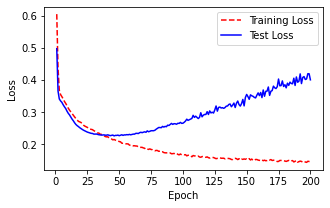

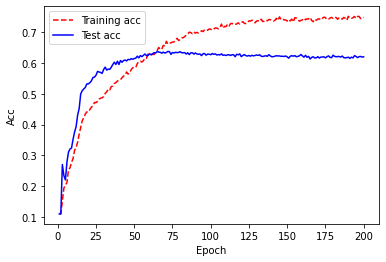

In [ ]:
model_NN = NN_arch2(0.0009)
#val_loss,val_acc = model_fit(model_NN,100)
history = model_NN.fit(X_train,y_train,epochs=200,verbose=1,batch_size=100,validation_data=(X_test, y_test)) 
history_plot(history)

In [ ]:
model_NN.save('/content/model_text_categorize.h5')

In [ ]:
loaded_model = tf.keras.models.load_model('/content/model_text_categorize.h5')

In [ ]:
#Load the word2vec pre trained Model to get the word embeddings for each token
model = KeyedVectors.load_word2vec_format('/content/GoogleNews-vectors-negative300.bin.gz',binary=True,limit=1000000)

In [ ]:
def clean_description_text(description):
  description = description.replace(r'\d+','')
  spec_chars = ["!",'"',"#","%","&","'","(",")",
                "*","+",",","-",".","/",":",";","<",
                "=",">","?","@","[","\\","]","^","_",
                "`","{","|","}","~","–"]
  for char in spec_chars:
      description = description.replace(char, ' ')

  word_list_t = description.lower().split() 
 
  filtered_words = [word for word in word_list_t if word not in stopwords.words('english')]
  text = ' '.join(filtered_words)
  return text

In [ ]:
description = 'robot'

clean_description = clean_description_text(description)
description_tokens = list(clean_description.split(" "))
description_tokens_filtered = token_check(description_tokens,model)

_arrays = np.zeros((1, 300))
_arrays[0,:] = word_vector(description_tokens_filtered,300,model)
vectorized_array = pd.DataFrame(_arrays)

pred = loaded_model.predict([vectorized_array.iloc[:,0:300]])

value = np.argmax(pred,axis=-1)
labels = ['adventure','art and music','food','history','manufacturing','nature','science and technology','sports','travel']

print("Predicted Label : " , labels[value.item()])  

1/1 [==============================] - 0s 28ms/step
Predicted Label :  science and technology


In [ ]:
vectorized_df.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.024719,0.063202,-0.054357,0.113420,-0.110855,0.028269,0.086772,-0.029327,0.051575,0.005269,...,-0.083984,0.073039,-0.088826,-0.074422,0.046855,-0.055272,0.020864,-0.060996,-0.037821,-0.071991
1,0.053044,0.063425,-0.031696,-0.004019,0.037795,-0.002310,0.018555,-0.098257,0.012489,0.060678,...,-0.143508,0.016310,-0.132531,0.102217,-0.067932,-0.009230,-0.036093,-0.053872,0.098778,-0.041584
2,-0.010413,0.068515,0.037320,0.090747,0.021960,0.068805,0.011243,-0.160822,0.073511,0.099237,...,-0.099612,0.002881,-0.130408,-0.058983,-0.012489,-0.049695,-0.031040,-0.092152,0.014050,-0.055670
3,0.063796,0.067345,0.041410,0.090609,-0.032114,0.038180,-0.007963,-0.212551,0.053828,0.043058,...,-0.062913,-0.012292,-0.068904,-0.011928,0.029579,-0.118211,0.068819,-0.047032,0.068650,-0.085679
4,0.076660,0.065318,0.030645,0.078562,-0.045288,0.002884,-0.085266,-0.124573,0.165507,0.013784,...,-0.004862,-0.005880,-0.129781,0.029958,0.110107,0.006927,-0.026138,-0.058268,0.017171,0.042714


In [ ]:
vectorized_df_lgbm = vectorized_df

In [ ]:
vectorized_df_lgbm['Target'] = df.Category


In [ ]:
import pandas
from sklearn import preprocessing 

In [ ]:
def target_label_encoding(x):
  labels = ['adventure','art and music','food','history','manufacturing','nature','science and technology','sports','travel']
  if x == labels[0]:
    return 0
  elif x == labels[1]:
    return 1
  elif x == labels[2]:
    return 2
  elif x == labels[3]:
    return 3
  elif x == labels[4]:
    return 4
  elif x == labels[5]:
    return 5
  elif x == labels[6]:
    return 6
  elif x == labels[7]:
    return 7
  else:
    return 8

In [ ]:
vectorized_df_lgbm.Target = vectorized_df_lgbm.Target.apply(lambda x : target_label_encoding(x))

In [ ]:
dataset_shuffled = vectorized_df.reindex(np.random.permutation(vectorized_df.index))


In [ ]:
from sklearn.model_selection import train_test_split

#target=['adventure','art and music','food','history','manufacturing','nature','science and technology','sports','travel']
X = dataset_shuffled.loc[:,~dataset_shuffled.columns.isin(['Target'])]
y = dataset_shuffled.loc[:,dataset_shuffled.columns.isin(['Target'])]

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.75,test_size=0.25,random_state=101)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import pandas as pd
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

estimator = lgb.LGBMClassifier(boosting_type='gbdt', 
                               learning_rate = 0.125, 
                               metric = 'multiclass', n_estimators = 20,
                               num_leaves = 38)

param_grid = {
    'n_estimators': [x for x in [75,100]],
    'learning_rate': [0.01,0.1,0.2],
    'num_leaves': [5,10],
    'boosting_type' : ['gbdt'],
    'objective' : ['multiclass'],
    'metric': ['multiclass'],
    'lambda_l1' : [0.10],
    'lambda_l2' : [0.20],
    'random_state' : [501]}

gridsearch = GridSearchCV(estimator, param_grid)

gridsearch.fit(X_train, y_train.values.ravel(),eval_set = [(X_test, y_test)],eval_metric = ['multi_logloss'],early_stopping_rounds = 10)

print('Best parameters found by grid search are:', gridsearch.best_params_)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[1]	valid_0's multi_logloss: 2.16285
[2]	valid_0's multi_logloss: 2.15285
[3]	valid_0's multi_logloss: 2.14351
[4]	valid_0's multi_logloss: 2.13435
[5]	valid_0's multi_logloss: 2.12533
[6]	valid_0's multi_logloss: 2.11656
[7]	valid_0's multi_logloss: 2.10812
[8]	valid_0's multi_logloss: 2.0998
[9]	valid_0's multi_logloss: 2.09174
[10]	valid_0's multi_logloss: 2.08394
[11]	valid_0's multi_logloss: 2.07627
[12]	valid_0's multi_logloss: 2.06916
[13]	valid_0's multi_logloss: 2.06203
[14]	valid_0's multi_logloss: 2.05488
[15]	valid_0's multi_logloss: 2.04822
[16]	valid_0's multi_logloss: 2.0416
[17]	valid_0's multi_logloss: 2.035
[18]	valid_0's multi_logloss: 2.02869
[19]	valid_0's multi_logloss: 2.02276
[20]	valid_0's multi_logloss: 2.01682
[21]	valid_0's multi_logloss: 2.01078
[22]	val

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[1]	valid_0's multi_logloss: 2.16266
[2]	valid_0's multi_logloss: 2.15258
[3]	valid_0's multi_logloss: 2.1425
[4]	valid_0's multi_logloss: 2.13289
[5]	valid_0's multi_logloss: 2.12382
[6]	valid_0's multi_logloss: 2.11505
[7]	valid_0's multi_logloss: 2.10674
[8]	valid_0's multi_logloss: 2.09845
[9]	valid_0's multi_logloss: 2.09041
[10]	valid_0's multi_logloss: 2.08273
[11]	valid_0's multi_logloss: 2.0752
[12]	valid_0's multi_logloss: 2.06781
[13]	valid_0's multi_logloss: 2.0608
[14]	valid_0's multi_logloss: 2.05386
[15]	valid_0's multi_logloss: 2.04713
[16]	valid_0's multi_logloss: 2.04037
[17]	valid_0's multi_logloss: 2.03394
[18]	valid_0's multi_logloss: 2.0275
[19]	valid_0's multi_logloss: 2.02126
[20]	valid_0's multi_logloss: 2.01519
[21]	valid_0's multi_logloss: 2.00892
[22]	val

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[1]	valid_0's multi_logloss: 2.16299
[2]	valid_0's multi_logloss: 2.15312
[3]	valid_0's multi_logloss: 2.14357
[4]	valid_0's multi_logloss: 2.13455
[5]	valid_0's multi_logloss: 2.12573
[6]	valid_0's multi_logloss: 2.117
[7]	valid_0's multi_logloss: 2.10846
[8]	valid_0's multi_logloss: 2.10034
[9]	valid_0's multi_logloss: 2.09234
[10]	valid_0's multi_logloss: 2.08458
[11]	valid_0's multi_logloss: 2.07688
[12]	valid_0's multi_logloss: 2.06984
[13]	valid_0's multi_logloss: 2.06251
[14]	valid_0's multi_logloss: 2.05529
[15]	valid_0's multi_logloss: 2.04862
[16]	valid_0's multi_logloss: 2.04215
[17]	valid_0's multi_logloss: 2.03566
[18]	valid_0's multi_logloss: 2.02926
[19]	valid_0's multi_logloss: 2.02325
[20]	valid_0's multi_logloss: 2.01698
[21]	valid_0's multi_logloss: 2.01114
[22]	v

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[1]	valid_0's multi_logloss: 2.16257
[2]	valid_0's multi_logloss: 2.1524
[3]	valid_0's multi_logloss: 2.14288
[4]	valid_0's multi_logloss: 2.1334
[5]	valid_0's multi_logloss: 2.12426
[6]	valid_0's multi_logloss: 2.11565
[7]	valid_0's multi_logloss: 2.10706
[8]	valid_0's multi_logloss: 2.09891
[9]	valid_0's multi_logloss: 2.09084
[10]	valid_0's multi_logloss: 2.08301
[11]	valid_0's multi_logloss: 2.0755
[12]	valid_0's multi_logloss: 2.068
[13]	valid_0's multi_logloss: 2.06091
[14]	valid_0's multi_logloss: 2.05396
[15]	valid_0's multi_logloss: 2.04725
[16]	valid_0's multi_logloss: 2.04071
[17]	valid_0's multi_logloss: 2.03398
[18]	valid_0's multi_logloss: 2.02755
[19]	valid_0's multi_logloss: 2.02142
[20]	valid_0's multi_logloss: 2.01513
[21]	valid_0's multi_logloss: 2.00879
[22]	vali

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[1]	valid_0's multi_logloss: 2.16266
[2]	valid_0's multi_logloss: 2.1523
[3]	valid_0's multi_logloss: 2.14265
[4]	valid_0's multi_logloss: 2.13325
[5]	valid_0's multi_logloss: 2.12434
[6]	valid_0's multi_logloss: 2.11565
[7]	valid_0's multi_logloss: 2.10712
[8]	valid_0's multi_logloss: 2.09882
[9]	valid_0's multi_logloss: 2.09084
[10]	valid_0's multi_logloss: 2.08308
[11]	valid_0's multi_logloss: 2.07572
[12]	valid_0's multi_logloss: 2.06853
[13]	valid_0's multi_logloss: 2.06157
[14]	valid_0's multi_logloss: 2.05454
[15]	valid_0's multi_logloss: 2.04785
[16]	valid_0's multi_logloss: 2.04144
[17]	valid_0's multi_logloss: 2.03493
[18]	valid_0's multi_logloss: 2.02877
[19]	valid_0's multi_logloss: 2.02273
[20]	valid_0's multi_logloss: 2.01681
[21]	valid_0's multi_logloss: 2.01096
[22]	

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[1]	valid_0's multi_logloss: 2.15945
[2]	valid_0's multi_logloss: 2.14654
[3]	valid_0's multi_logloss: 2.13412
[4]	valid_0's multi_logloss: 2.12222
[5]	valid_0's multi_logloss: 2.11113
[6]	valid_0's multi_logloss: 2.09969
[7]	valid_0's multi_logloss: 2.08905
[8]	valid_0's multi_logloss: 2.07851
[9]	valid_0's multi_logloss: 2.06826
[10]	valid_0's multi_logloss: 2.05834
[11]	valid_0's multi_logloss: 2.04861
[12]	valid_0's multi_logloss: 2.03929
[13]	valid_0's multi_logloss: 2.02998
[14]	valid_0's multi_logloss: 2.02139
[15]	valid_0's multi_logloss: 2.01282
[16]	valid_0's multi_logloss: 2.00419
[17]	valid_0's multi_logloss: 1.99593
[18]	valid_0's multi_logloss: 1.98784
[19]	valid_0's multi_logloss: 1.98002
[20]	valid_0's multi_logloss: 1.97226
[21]	valid_0's multi_logloss: 1.96481
[22]

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[1]	valid_0's multi_logloss: 2.15954
[2]	valid_0's multi_logloss: 2.1463
[3]	valid_0's multi_logloss: 2.13383
[4]	valid_0's multi_logloss: 2.12194
[5]	valid_0's multi_logloss: 2.11015
[6]	valid_0's multi_logloss: 2.09885
[7]	valid_0's multi_logloss: 2.08792
[8]	valid_0's multi_logloss: 2.07744
[9]	valid_0's multi_logloss: 2.06708
[10]	valid_0's multi_logloss: 2.05707
[11]	valid_0's multi_logloss: 2.04755
[12]	valid_0's multi_logloss: 2.03821
[13]	valid_0's multi_logloss: 2.0291
[14]	valid_0's multi_logloss: 2.02029
[15]	valid_0's multi_logloss: 2.01197
[16]	valid_0's multi_logloss: 2.00363
[17]	valid_0's multi_logloss: 1.99548
[18]	valid_0's multi_logloss: 1.98761
[19]	valid_0's multi_logloss: 1.97987
[20]	valid_0's multi_logloss: 1.97225
[21]	valid_0's multi_logloss: 1.96485
[22]	v

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[1]	valid_0's multi_logloss: 2.16001
[2]	valid_0's multi_logloss: 2.14711
[3]	valid_0's multi_logloss: 2.13461
[4]	valid_0's multi_logloss: 2.12268
[5]	valid_0's multi_logloss: 2.11076
[6]	valid_0's multi_logloss: 2.09953
[7]	valid_0's multi_logloss: 2.08829
[8]	valid_0's multi_logloss: 2.07766
[9]	valid_0's multi_logloss: 2.06735
[10]	valid_0's multi_logloss: 2.05713
[11]	valid_0's multi_logloss: 2.04747
[12]	valid_0's multi_logloss: 2.03789
[13]	valid_0's multi_logloss: 2.0287
[14]	valid_0's multi_logloss: 2.01965
[15]	valid_0's multi_logloss: 2.01106
[16]	valid_0's multi_logloss: 2.00248
[17]	valid_0's multi_logloss: 1.99423
[18]	valid_0's multi_logloss: 1.98609
[19]	valid_0's multi_logloss: 1.97836
[20]	valid_0's multi_logloss: 1.97066
[21]	valid_0's multi_logloss: 1.96325
[22]	

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[1]	valid_0's multi_logloss: 2.15931
[2]	valid_0's multi_logloss: 2.14577
[3]	valid_0's multi_logloss: 2.13305
[4]	valid_0's multi_logloss: 2.12105
[5]	valid_0's multi_logloss: 2.10955
[6]	valid_0's multi_logloss: 2.09812
[7]	valid_0's multi_logloss: 2.08724
[8]	valid_0's multi_logloss: 2.07675
[9]	valid_0's multi_logloss: 2.06661
[10]	valid_0's multi_logloss: 2.05645
[11]	valid_0's multi_logloss: 2.04659
[12]	valid_0's multi_logloss: 2.03744
[13]	valid_0's multi_logloss: 2.02824
[14]	valid_0's multi_logloss: 2.0194
[15]	valid_0's multi_logloss: 2.01064
[16]	valid_0's multi_logloss: 2.00222
[17]	valid_0's multi_logloss: 1.99388
[18]	valid_0's multi_logloss: 1.98561
[19]	valid_0's multi_logloss: 1.97754
[20]	valid_0's multi_logloss: 1.96955
[21]	valid_0's multi_logloss: 1.96211
[22]	

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[1]	valid_0's multi_logloss: 2.15951
[2]	valid_0's multi_logloss: 2.14627
[3]	valid_0's multi_logloss: 2.13384
[4]	valid_0's multi_logloss: 2.12183
[5]	valid_0's multi_logloss: 2.11033
[6]	valid_0's multi_logloss: 2.0992
[7]	valid_0's multi_logloss: 2.08844
[8]	valid_0's multi_logloss: 2.07821
[9]	valid_0's multi_logloss: 2.068
[10]	valid_0's multi_logloss: 2.05824
[11]	valid_0's multi_logloss: 2.04879
[12]	valid_0's multi_logloss: 2.03966
[13]	valid_0's multi_logloss: 2.03071
[14]	valid_0's multi_logloss: 2.02196
[15]	valid_0's multi_logloss: 2.01361
[16]	valid_0's multi_logloss: 2.00536
[17]	valid_0's multi_logloss: 1.99741
[18]	valid_0's multi_logloss: 1.98958
[19]	valid_0's multi_logloss: 1.98184
[20]	valid_0's multi_logloss: 1.97452
[21]	valid_0's multi_logloss: 1.96717
[22]	va

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[1]	valid_0's multi_logloss: 2.16285
[2]	valid_0's multi_logloss: 2.15285
[3]	valid_0's multi_logloss: 2.14351
[4]	valid_0's multi_logloss: 2.13435
[5]	valid_0's multi_logloss: 2.12533
[6]	valid_0's multi_logloss: 2.11656
[7]	valid_0's multi_logloss: 2.10812
[8]	valid_0's multi_logloss: 2.0998
[9]	valid_0's multi_logloss: 2.09174
[10]	valid_0's multi_logloss: 2.08394
[11]	valid_0's multi_logloss: 2.07627
[12]	valid_0's multi_logloss: 2.06916
[13]	valid_0's multi_logloss: 2.06203
[14]	valid_0's multi_logloss: 2.05488
[15]	valid_0's multi_logloss: 2.04822
[16]	valid_0's multi_logloss: 2.0416
[17]	valid_0's multi_logloss: 2.035
[18]	valid_0's multi_logloss: 2.02869
[19]	valid_0's multi_logloss: 2.02276
[20]	valid_0's multi_logloss: 2.01682
[21]	valid_0's multi_logloss: 2.01078
[22]	val

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[1]	valid_0's multi_logloss: 2.16266
[2]	valid_0's multi_logloss: 2.15258
[3]	valid_0's multi_logloss: 2.1425
[4]	valid_0's multi_logloss: 2.13289
[5]	valid_0's multi_logloss: 2.12382
[6]	valid_0's multi_logloss: 2.11505
[7]	valid_0's multi_logloss: 2.10674
[8]	valid_0's multi_logloss: 2.09845
[9]	valid_0's multi_logloss: 2.09041
[10]	valid_0's multi_logloss: 2.08273
[11]	valid_0's multi_logloss: 2.0752
[12]	valid_0's multi_logloss: 2.06781
[13]	valid_0's multi_logloss: 2.0608
[14]	valid_0's multi_logloss: 2.05386
[15]	valid_0's multi_logloss: 2.04713
[16]	valid_0's multi_logloss: 2.04037
[17]	valid_0's multi_logloss: 2.03394
[18]	valid_0's multi_logloss: 2.0275
[19]	valid_0's multi_logloss: 2.02126
[20]	valid_0's multi_logloss: 2.01519
[21]	valid_0's multi_logloss: 2.00892
[22]	val

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[1]	valid_0's multi_logloss: 2.16299
[2]	valid_0's multi_logloss: 2.15312
[3]	valid_0's multi_logloss: 2.14357
[4]	valid_0's multi_logloss: 2.13455
[5]	valid_0's multi_logloss: 2.12573
[6]	valid_0's multi_logloss: 2.117
[7]	valid_0's multi_logloss: 2.10846
[8]	valid_0's multi_logloss: 2.10034
[9]	valid_0's multi_logloss: 2.09234
[10]	valid_0's multi_logloss: 2.08458
[11]	valid_0's multi_logloss: 2.07688
[12]	valid_0's multi_logloss: 2.06984
[13]	valid_0's multi_logloss: 2.06251
[14]	valid_0's multi_logloss: 2.05529
[15]	valid_0's multi_logloss: 2.04862
[16]	valid_0's multi_logloss: 2.04215
[17]	valid_0's multi_logloss: 2.03566
[18]	valid_0's multi_logloss: 2.02926
[19]	valid_0's multi_logloss: 2.02325
[20]	valid_0's multi_logloss: 2.01698
[21]	valid_0's multi_logloss: 2.01114
[22]	v

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[1]	valid_0's multi_logloss: 2.16257
[2]	valid_0's multi_logloss: 2.1524
[3]	valid_0's multi_logloss: 2.14288
[4]	valid_0's multi_logloss: 2.1334
[5]	valid_0's multi_logloss: 2.12426
[6]	valid_0's multi_logloss: 2.11565
[7]	valid_0's multi_logloss: 2.10706
[8]	valid_0's multi_logloss: 2.09891
[9]	valid_0's multi_logloss: 2.09084
[10]	valid_0's multi_logloss: 2.08301
[11]	valid_0's multi_logloss: 2.0755
[12]	valid_0's multi_logloss: 2.068
[13]	valid_0's multi_logloss: 2.06091
[14]	valid_0's multi_logloss: 2.05396
[15]	valid_0's multi_logloss: 2.04725
[16]	valid_0's multi_logloss: 2.04071
[17]	valid_0's multi_logloss: 2.03398
[18]	valid_0's multi_logloss: 2.02755
[19]	valid_0's multi_logloss: 2.02142
[20]	valid_0's multi_logloss: 2.01513
[21]	valid_0's multi_logloss: 2.00879
[22]	vali

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[1]	valid_0's multi_logloss: 2.16266
[2]	valid_0's multi_logloss: 2.1523
[3]	valid_0's multi_logloss: 2.14265
[4]	valid_0's multi_logloss: 2.13325
[5]	valid_0's multi_logloss: 2.12434
[6]	valid_0's multi_logloss: 2.11565
[7]	valid_0's multi_logloss: 2.10712
[8]	valid_0's multi_logloss: 2.09882
[9]	valid_0's multi_logloss: 2.09084
[10]	valid_0's multi_logloss: 2.08308
[11]	valid_0's multi_logloss: 2.07572
[12]	valid_0's multi_logloss: 2.06853
[13]	valid_0's multi_logloss: 2.06157
[14]	valid_0's multi_logloss: 2.05454
[15]	valid_0's multi_logloss: 2.04785
[16]	valid_0's multi_logloss: 2.04144
[17]	valid_0's multi_logloss: 2.03493
[18]	valid_0's multi_logloss: 2.02877
[19]	valid_0's multi_logloss: 2.02273
[20]	valid_0's multi_logloss: 2.01681
[21]	valid_0's multi_logloss: 2.01096
[22]	

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[1]	valid_0's multi_logloss: 2.15945
[2]	valid_0's multi_logloss: 2.14654
[3]	valid_0's multi_logloss: 2.13412
[4]	valid_0's multi_logloss: 2.12222
[5]	valid_0's multi_logloss: 2.11113
[6]	valid_0's multi_logloss: 2.09969
[7]	valid_0's multi_logloss: 2.08905
[8]	valid_0's multi_logloss: 2.07851
[9]	valid_0's multi_logloss: 2.06826
[10]	valid_0's multi_logloss: 2.05834
[11]	valid_0's multi_logloss: 2.04861
[12]	valid_0's multi_logloss: 2.03929
[13]	valid_0's multi_logloss: 2.02998
[14]	valid_0's multi_logloss: 2.02139
[15]	valid_0's multi_logloss: 2.01282
[16]	valid_0's multi_logloss: 2.00419
[17]	valid_0's multi_logloss: 1.99593
[18]	valid_0's multi_logloss: 1.98784
[19]	valid_0's multi_logloss: 1.98002
[20]	valid_0's multi_logloss: 1.97226
[21]	valid_0's multi_logloss: 1.96481
[22]

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[1]	valid_0's multi_logloss: 2.15954
[2]	valid_0's multi_logloss: 2.1463
[3]	valid_0's multi_logloss: 2.13383
[4]	valid_0's multi_logloss: 2.12194
[5]	valid_0's multi_logloss: 2.11015
[6]	valid_0's multi_logloss: 2.09885
[7]	valid_0's multi_logloss: 2.08792
[8]	valid_0's multi_logloss: 2.07744
[9]	valid_0's multi_logloss: 2.06708
[10]	valid_0's multi_logloss: 2.05707
[11]	valid_0's multi_logloss: 2.04755
[12]	valid_0's multi_logloss: 2.03821
[13]	valid_0's multi_logloss: 2.0291
[14]	valid_0's multi_logloss: 2.02029
[15]	valid_0's multi_logloss: 2.01197
[16]	valid_0's multi_logloss: 2.00363
[17]	valid_0's multi_logloss: 1.99548
[18]	valid_0's multi_logloss: 1.98761
[19]	valid_0's multi_logloss: 1.97987
[20]	valid_0's multi_logloss: 1.97225
[21]	valid_0's multi_logloss: 1.96485
[22]	v

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[1]	valid_0's multi_logloss: 2.16001
[2]	valid_0's multi_logloss: 2.14711
[3]	valid_0's multi_logloss: 2.13461
[4]	valid_0's multi_logloss: 2.12268
[5]	valid_0's multi_logloss: 2.11076
[6]	valid_0's multi_logloss: 2.09953
[7]	valid_0's multi_logloss: 2.08829
[8]	valid_0's multi_logloss: 2.07766
[9]	valid_0's multi_logloss: 2.06735
[10]	valid_0's multi_logloss: 2.05713
[11]	valid_0's multi_logloss: 2.04747
[12]	valid_0's multi_logloss: 2.03789
[13]	valid_0's multi_logloss: 2.0287
[14]	valid_0's multi_logloss: 2.01965
[15]	valid_0's multi_logloss: 2.01106
[16]	valid_0's multi_logloss: 2.00248
[17]	valid_0's multi_logloss: 1.99423
[18]	valid_0's multi_logloss: 1.98609
[19]	valid_0's multi_logloss: 1.97836
[20]	valid_0's multi_logloss: 1.97066
[21]	valid_0's multi_logloss: 1.96325
[22]	

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[1]	valid_0's multi_logloss: 2.15931
[2]	valid_0's multi_logloss: 2.14577
[3]	valid_0's multi_logloss: 2.13305
[4]	valid_0's multi_logloss: 2.12105
[5]	valid_0's multi_logloss: 2.10955
[6]	valid_0's multi_logloss: 2.09812
[7]	valid_0's multi_logloss: 2.08724
[8]	valid_0's multi_logloss: 2.07675
[9]	valid_0's multi_logloss: 2.06661
[10]	valid_0's multi_logloss: 2.05645
[11]	valid_0's multi_logloss: 2.04659
[12]	valid_0's multi_logloss: 2.03744
[13]	valid_0's multi_logloss: 2.02824
[14]	valid_0's multi_logloss: 2.0194
[15]	valid_0's multi_logloss: 2.01064
[16]	valid_0's multi_logloss: 2.00222
[17]	valid_0's multi_logloss: 1.99388
[18]	valid_0's multi_logloss: 1.98561
[19]	valid_0's multi_logloss: 1.97754
[20]	valid_0's multi_logloss: 1.96955
[21]	valid_0's multi_logloss: 1.96211
[22]	

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[1]	valid_0's multi_logloss: 2.15951
[2]	valid_0's multi_logloss: 2.14627
[3]	valid_0's multi_logloss: 2.13384
[4]	valid_0's multi_logloss: 2.12183
[5]	valid_0's multi_logloss: 2.11033
[6]	valid_0's multi_logloss: 2.0992
[7]	valid_0's multi_logloss: 2.08844
[8]	valid_0's multi_logloss: 2.07821
[9]	valid_0's multi_logloss: 2.068
[10]	valid_0's multi_logloss: 2.05824
[11]	valid_0's multi_logloss: 2.04879
[12]	valid_0's multi_logloss: 2.03966
[13]	valid_0's multi_logloss: 2.03071
[14]	valid_0's multi_logloss: 2.02196
[15]	valid_0's multi_logloss: 2.01361
[16]	valid_0's multi_logloss: 2.00536
[17]	valid_0's multi_logloss: 1.99741
[18]	valid_0's multi_logloss: 1.98958
[19]	valid_0's multi_logloss: 1.98184
[20]	valid_0's multi_logloss: 1.97452
[21]	valid_0's multi_logloss: 1.96717
[22]	va

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[1]	valid_0's multi_logloss: 2.07255
[2]	valid_0's multi_logloss: 2.00097
[3]	valid_0's multi_logloss: 1.94598
[4]	valid_0's multi_logloss: 1.89947
[5]	valid_0's multi_logloss: 1.85667
[6]	valid_0's multi_logloss: 1.81832
[7]	valid_0's multi_logloss: 1.78344
[8]	valid_0's multi_logloss: 1.75238
[9]	valid_0's multi_logloss: 1.72398
[10]	valid_0's multi_logloss: 1.69933
[11]	valid_0's multi_logloss: 1.67733
[12]	valid_0's multi_logloss: 1.65678
[13]	valid_0's multi_logloss: 1.63532
[14]	valid_0's multi_logloss: 1.6168
[15]	valid_0's multi_logloss: 1.59901
[16]	valid_0's multi_logloss: 1.58232
[17]	valid_0's multi_logloss: 1.56766
[18]	valid_0's multi_logloss: 1.55281
[19]	valid_0's multi_logloss: 1.53752
[20]	valid_0's multi_logloss: 1.5245
[21]	valid_0's multi_logloss: 1.51179
[22]	v

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[1]	valid_0's multi_logloss: 2.07087
[2]	valid_0's multi_logloss: 2.00287
[3]	valid_0's multi_logloss: 1.94709
[4]	valid_0's multi_logloss: 1.89947
[5]	valid_0's multi_logloss: 1.85592
[6]	valid_0's multi_logloss: 1.81751
[7]	valid_0's multi_logloss: 1.78457
[8]	valid_0's multi_logloss: 1.75454
[9]	valid_0's multi_logloss: 1.72534
[10]	valid_0's multi_logloss: 1.70122
[11]	valid_0's multi_logloss: 1.67711
[12]	valid_0's multi_logloss: 1.6544
[13]	valid_0's multi_logloss: 1.63334
[14]	valid_0's multi_logloss: 1.61223
[15]	valid_0's multi_logloss: 1.59481
[16]	valid_0's multi_logloss: 1.5783
[17]	valid_0's multi_logloss: 1.56331
[18]	valid_0's multi_logloss: 1.54874
[19]	valid_0's multi_logloss: 1.53404
[20]	valid_0's multi_logloss: 1.52017
[21]	valid_0's multi_logloss: 1.50754
[22]	v

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[1]	valid_0's multi_logloss: 2.07394
[2]	valid_0's multi_logloss: 2.00363
[3]	valid_0's multi_logloss: 1.94766
[4]	valid_0's multi_logloss: 1.90137
[5]	valid_0's multi_logloss: 1.86032
[6]	valid_0's multi_logloss: 1.82271
[7]	valid_0's multi_logloss: 1.78901
[8]	valid_0's multi_logloss: 1.75841
[9]	valid_0's multi_logloss: 1.7313
[10]	valid_0's multi_logloss: 1.70492
[11]	valid_0's multi_logloss: 1.68199
[12]	valid_0's multi_logloss: 1.65974
[13]	valid_0's multi_logloss: 1.63901
[14]	valid_0's multi_logloss: 1.6192
[15]	valid_0's multi_logloss: 1.60173
[16]	valid_0's multi_logloss: 1.58428
[17]	valid_0's multi_logloss: 1.56821
[18]	valid_0's multi_logloss: 1.55274
[19]	valid_0's multi_logloss: 1.53946
[20]	valid_0's multi_logloss: 1.52703
[21]	valid_0's multi_logloss: 1.51427
[22]	v

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[1]	valid_0's multi_logloss: 2.06996
[2]	valid_0's multi_logloss: 1.99902
[3]	valid_0's multi_logloss: 1.94197
[4]	valid_0's multi_logloss: 1.89465
[5]	valid_0's multi_logloss: 1.85165
[6]	valid_0's multi_logloss: 1.81594
[7]	valid_0's multi_logloss: 1.78189
[8]	valid_0's multi_logloss: 1.75146
[9]	valid_0's multi_logloss: 1.72451
[10]	valid_0's multi_logloss: 1.6987
[11]	valid_0's multi_logloss: 1.67379
[12]	valid_0's multi_logloss: 1.65165
[13]	valid_0's multi_logloss: 1.62977
[14]	valid_0's multi_logloss: 1.61082
[15]	valid_0's multi_logloss: 1.59392
[16]	valid_0's multi_logloss: 1.57757
[17]	valid_0's multi_logloss: 1.56132
[18]	valid_0's multi_logloss: 1.54803
[19]	valid_0's multi_logloss: 1.53373
[20]	valid_0's multi_logloss: 1.51971
[21]	valid_0's multi_logloss: 1.50733
[22]	

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[1]	valid_0's multi_logloss: 2.07062
[2]	valid_0's multi_logloss: 2.00201
[3]	valid_0's multi_logloss: 1.9488
[4]	valid_0's multi_logloss: 1.90122
[5]	valid_0's multi_logloss: 1.85827
[6]	valid_0's multi_logloss: 1.81911
[7]	valid_0's multi_logloss: 1.78489
[8]	valid_0's multi_logloss: 1.75378
[9]	valid_0's multi_logloss: 1.72628
[10]	valid_0's multi_logloss: 1.70139
[11]	valid_0's multi_logloss: 1.67678
[12]	valid_0's multi_logloss: 1.65595
[13]	valid_0's multi_logloss: 1.63529
[14]	valid_0's multi_logloss: 1.61501
[15]	valid_0's multi_logloss: 1.5973
[16]	valid_0's multi_logloss: 1.58047
[17]	valid_0's multi_logloss: 1.56464
[18]	valid_0's multi_logloss: 1.55021
[19]	valid_0's multi_logloss: 1.53562
[20]	valid_0's multi_logloss: 1.52065
[21]	valid_0's multi_logloss: 1.50909
[22]	v

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[1]	valid_0's multi_logloss: 2.04072
[2]	valid_0's multi_logloss: 1.95184
[3]	valid_0's multi_logloss: 1.88241
[4]	valid_0's multi_logloss: 1.82616
[5]	valid_0's multi_logloss: 1.7776
[6]	valid_0's multi_logloss: 1.73345
[7]	valid_0's multi_logloss: 1.69482
[8]	valid_0's multi_logloss: 1.66189
[9]	valid_0's multi_logloss: 1.63288
[10]	valid_0's multi_logloss: 1.60556
[11]	valid_0's multi_logloss: 1.57852
[12]	valid_0's multi_logloss: 1.55408
[13]	valid_0's multi_logloss: 1.53228
[14]	valid_0's multi_logloss: 1.51086
[15]	valid_0's multi_logloss: 1.49162
[16]	valid_0's multi_logloss: 1.47376
[17]	valid_0's multi_logloss: 1.45755
[18]	valid_0's multi_logloss: 1.44267
[19]	valid_0's multi_logloss: 1.4288
[20]	valid_0's multi_logloss: 1.41599
[21]	valid_0's multi_logloss: 1.40253
[22]	v

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[1]	valid_0's multi_logloss: 2.04184
[2]	valid_0's multi_logloss: 1.95576
[3]	valid_0's multi_logloss: 1.88901
[4]	valid_0's multi_logloss: 1.82824
[5]	valid_0's multi_logloss: 1.77967
[6]	valid_0's multi_logloss: 1.7375
[7]	valid_0's multi_logloss: 1.69797
[8]	valid_0's multi_logloss: 1.66221
[9]	valid_0's multi_logloss: 1.62991
[10]	valid_0's multi_logloss: 1.60288
[11]	valid_0's multi_logloss: 1.57654
[12]	valid_0's multi_logloss: 1.55317
[13]	valid_0's multi_logloss: 1.53086
[14]	valid_0's multi_logloss: 1.51036
[15]	valid_0's multi_logloss: 1.49198
[16]	valid_0's multi_logloss: 1.4737
[17]	valid_0's multi_logloss: 1.45763
[18]	valid_0's multi_logloss: 1.44229
[19]	valid_0's multi_logloss: 1.42752
[20]	valid_0's multi_logloss: 1.41347
[21]	valid_0's multi_logloss: 1.40117
[22]	v

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[1]	valid_0's multi_logloss: 2.04607
[2]	valid_0's multi_logloss: 1.95546
[3]	valid_0's multi_logloss: 1.88658
[4]	valid_0's multi_logloss: 1.83081
[5]	valid_0's multi_logloss: 1.78217
[6]	valid_0's multi_logloss: 1.73747
[7]	valid_0's multi_logloss: 1.69914
[8]	valid_0's multi_logloss: 1.66571
[9]	valid_0's multi_logloss: 1.6341
[10]	valid_0's multi_logloss: 1.60668
[11]	valid_0's multi_logloss: 1.5803
[12]	valid_0's multi_logloss: 1.55606
[13]	valid_0's multi_logloss: 1.53308
[14]	valid_0's multi_logloss: 1.51409
[15]	valid_0's multi_logloss: 1.49619
[16]	valid_0's multi_logloss: 1.47922
[17]	valid_0's multi_logloss: 1.46245
[18]	valid_0's multi_logloss: 1.44631
[19]	valid_0's multi_logloss: 1.43213
[20]	valid_0's multi_logloss: 1.41844
[21]	valid_0's multi_logloss: 1.40503
[22]	v

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[1]	valid_0's multi_logloss: 2.03953
[2]	valid_0's multi_logloss: 1.94737
[3]	valid_0's multi_logloss: 1.87915
[4]	valid_0's multi_logloss: 1.82126
[5]	valid_0's multi_logloss: 1.77167
[6]	valid_0's multi_logloss: 1.72868
[7]	valid_0's multi_logloss: 1.68825
[8]	valid_0's multi_logloss: 1.65434
[9]	valid_0's multi_logloss: 1.62357
[10]	valid_0's multi_logloss: 1.596
[11]	valid_0's multi_logloss: 1.5693
[12]	valid_0's multi_logloss: 1.54615
[13]	valid_0's multi_logloss: 1.52417
[14]	valid_0's multi_logloss: 1.50513
[15]	valid_0's multi_logloss: 1.48625
[16]	valid_0's multi_logloss: 1.46817
[17]	valid_0's multi_logloss: 1.45139
[18]	valid_0's multi_logloss: 1.43608
[19]	valid_0's multi_logloss: 1.42226
[20]	valid_0's multi_logloss: 1.40865
[21]	valid_0's multi_logloss: 1.39674
[22]	va

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[1]	valid_0's multi_logloss: 2.04122
[2]	valid_0's multi_logloss: 1.95584
[3]	valid_0's multi_logloss: 1.88796
[4]	valid_0's multi_logloss: 1.83372
[5]	valid_0's multi_logloss: 1.78456
[6]	valid_0's multi_logloss: 1.73885
[7]	valid_0's multi_logloss: 1.7003
[8]	valid_0's multi_logloss: 1.665
[9]	valid_0's multi_logloss: 1.63328
[10]	valid_0's multi_logloss: 1.60487
[11]	valid_0's multi_logloss: 1.57877
[12]	valid_0's multi_logloss: 1.55441
[13]	valid_0's multi_logloss: 1.5329
[14]	valid_0's multi_logloss: 1.51116
[15]	valid_0's multi_logloss: 1.49216
[16]	valid_0's multi_logloss: 1.47267
[17]	valid_0's multi_logloss: 1.45502
[18]	valid_0's multi_logloss: 1.44018
[19]	valid_0's multi_logloss: 1.42436
[20]	valid_0's multi_logloss: 1.40987
[21]	valid_0's multi_logloss: 1.39663
[22]	val

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[1]	valid_0's multi_logloss: 2.07255
[2]	valid_0's multi_logloss: 2.00097
[3]	valid_0's multi_logloss: 1.94598
[4]	valid_0's multi_logloss: 1.89947
[5]	valid_0's multi_logloss: 1.85667
[6]	valid_0's multi_logloss: 1.81832
[7]	valid_0's multi_logloss: 1.78344
[8]	valid_0's multi_logloss: 1.75238
[9]	valid_0's multi_logloss: 1.72398
[10]	valid_0's multi_logloss: 1.69933
[11]	valid_0's multi_logloss: 1.67733
[12]	valid_0's multi_logloss: 1.65678
[13]	valid_0's multi_logloss: 1.63532
[14]	valid_0's multi_logloss: 1.6168
[15]	valid_0's multi_logloss: 1.59901
[16]	valid_0's multi_logloss: 1.58232
[17]	valid_0's multi_logloss: 1.56766
[18]	valid_0's multi_logloss: 1.55281
[19]	valid_0's multi_logloss: 1.53752
[20]	valid_0's multi_logloss: 1.5245
[21]	valid_0's multi_logloss: 1.51179
[22]	v

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[1]	valid_0's multi_logloss: 2.07087
[2]	valid_0's multi_logloss: 2.00287
[3]	valid_0's multi_logloss: 1.94709
[4]	valid_0's multi_logloss: 1.89947
[5]	valid_0's multi_logloss: 1.85592
[6]	valid_0's multi_logloss: 1.81751
[7]	valid_0's multi_logloss: 1.78457
[8]	valid_0's multi_logloss: 1.75454
[9]	valid_0's multi_logloss: 1.72534
[10]	valid_0's multi_logloss: 1.70122
[11]	valid_0's multi_logloss: 1.67711
[12]	valid_0's multi_logloss: 1.6544
[13]	valid_0's multi_logloss: 1.63334
[14]	valid_0's multi_logloss: 1.61223
[15]	valid_0's multi_logloss: 1.59481
[16]	valid_0's multi_logloss: 1.5783
[17]	valid_0's multi_logloss: 1.56331
[18]	valid_0's multi_logloss: 1.54874
[19]	valid_0's multi_logloss: 1.53404
[20]	valid_0's multi_logloss: 1.52017
[21]	valid_0's multi_logloss: 1.50754
[22]	v

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[1]	valid_0's multi_logloss: 2.07394
[2]	valid_0's multi_logloss: 2.00363
[3]	valid_0's multi_logloss: 1.94766
[4]	valid_0's multi_logloss: 1.90137
[5]	valid_0's multi_logloss: 1.86032
[6]	valid_0's multi_logloss: 1.82271
[7]	valid_0's multi_logloss: 1.78901
[8]	valid_0's multi_logloss: 1.75841
[9]	valid_0's multi_logloss: 1.7313
[10]	valid_0's multi_logloss: 1.70492
[11]	valid_0's multi_logloss: 1.68199
[12]	valid_0's multi_logloss: 1.65974
[13]	valid_0's multi_logloss: 1.63901
[14]	valid_0's multi_logloss: 1.6192
[15]	valid_0's multi_logloss: 1.60173
[16]	valid_0's multi_logloss: 1.58428
[17]	valid_0's multi_logloss: 1.56821
[18]	valid_0's multi_logloss: 1.55274
[19]	valid_0's multi_logloss: 1.53946
[20]	valid_0's multi_logloss: 1.52703
[21]	valid_0's multi_logloss: 1.51427
[22]	v

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[1]	valid_0's multi_logloss: 2.06996
[2]	valid_0's multi_logloss: 1.99902
[3]	valid_0's multi_logloss: 1.94197
[4]	valid_0's multi_logloss: 1.89465
[5]	valid_0's multi_logloss: 1.85165
[6]	valid_0's multi_logloss: 1.81594
[7]	valid_0's multi_logloss: 1.78189
[8]	valid_0's multi_logloss: 1.75146
[9]	valid_0's multi_logloss: 1.72451
[10]	valid_0's multi_logloss: 1.6987
[11]	valid_0's multi_logloss: 1.67379
[12]	valid_0's multi_logloss: 1.65165
[13]	valid_0's multi_logloss: 1.62977
[14]	valid_0's multi_logloss: 1.61082
[15]	valid_0's multi_logloss: 1.59392
[16]	valid_0's multi_logloss: 1.57757
[17]	valid_0's multi_logloss: 1.56132
[18]	valid_0's multi_logloss: 1.54803
[19]	valid_0's multi_logloss: 1.53373
[20]	valid_0's multi_logloss: 1.51971
[21]	valid_0's multi_logloss: 1.50733
[22]	

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[1]	valid_0's multi_logloss: 2.07062
[2]	valid_0's multi_logloss: 2.00201
[3]	valid_0's multi_logloss: 1.9488
[4]	valid_0's multi_logloss: 1.90122
[5]	valid_0's multi_logloss: 1.85827
[6]	valid_0's multi_logloss: 1.81911
[7]	valid_0's multi_logloss: 1.78489
[8]	valid_0's multi_logloss: 1.75378
[9]	valid_0's multi_logloss: 1.72628
[10]	valid_0's multi_logloss: 1.70139
[11]	valid_0's multi_logloss: 1.67678
[12]	valid_0's multi_logloss: 1.65595
[13]	valid_0's multi_logloss: 1.63529
[14]	valid_0's multi_logloss: 1.61501
[15]	valid_0's multi_logloss: 1.5973
[16]	valid_0's multi_logloss: 1.58047
[17]	valid_0's multi_logloss: 1.56464
[18]	valid_0's multi_logloss: 1.55021
[19]	valid_0's multi_logloss: 1.53562
[20]	valid_0's multi_logloss: 1.52065
[21]	valid_0's multi_logloss: 1.50909
[22]	v

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[1]	valid_0's multi_logloss: 2.04072
[2]	valid_0's multi_logloss: 1.95184
[3]	valid_0's multi_logloss: 1.88241
[4]	valid_0's multi_logloss: 1.82616
[5]	valid_0's multi_logloss: 1.7776
[6]	valid_0's multi_logloss: 1.73345
[7]	valid_0's multi_logloss: 1.69482
[8]	valid_0's multi_logloss: 1.66189
[9]	valid_0's multi_logloss: 1.63288
[10]	valid_0's multi_logloss: 1.60556
[11]	valid_0's multi_logloss: 1.57852
[12]	valid_0's multi_logloss: 1.55408
[13]	valid_0's multi_logloss: 1.53228
[14]	valid_0's multi_logloss: 1.51086
[15]	valid_0's multi_logloss: 1.49162
[16]	valid_0's multi_logloss: 1.47376
[17]	valid_0's multi_logloss: 1.45755
[18]	valid_0's multi_logloss: 1.44267
[19]	valid_0's multi_logloss: 1.4288
[20]	valid_0's multi_logloss: 1.41599
[21]	valid_0's multi_logloss: 1.40253
[22]	v

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[1]	valid_0's multi_logloss: 2.04184
[2]	valid_0's multi_logloss: 1.95576
[3]	valid_0's multi_logloss: 1.88901
[4]	valid_0's multi_logloss: 1.82824
[5]	valid_0's multi_logloss: 1.77967
[6]	valid_0's multi_logloss: 1.7375
[7]	valid_0's multi_logloss: 1.69797
[8]	valid_0's multi_logloss: 1.66221
[9]	valid_0's multi_logloss: 1.62991
[10]	valid_0's multi_logloss: 1.60288
[11]	valid_0's multi_logloss: 1.57654
[12]	valid_0's multi_logloss: 1.55317
[13]	valid_0's multi_logloss: 1.53086
[14]	valid_0's multi_logloss: 1.51036
[15]	valid_0's multi_logloss: 1.49198
[16]	valid_0's multi_logloss: 1.4737
[17]	valid_0's multi_logloss: 1.45763
[18]	valid_0's multi_logloss: 1.44229
[19]	valid_0's multi_logloss: 1.42752
[20]	valid_0's multi_logloss: 1.41347
[21]	valid_0's multi_logloss: 1.40117
[22]	v

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[1]	valid_0's multi_logloss: 2.04607
[2]	valid_0's multi_logloss: 1.95546
[3]	valid_0's multi_logloss: 1.88658
[4]	valid_0's multi_logloss: 1.83081
[5]	valid_0's multi_logloss: 1.78217
[6]	valid_0's multi_logloss: 1.73747
[7]	valid_0's multi_logloss: 1.69914
[8]	valid_0's multi_logloss: 1.66571
[9]	valid_0's multi_logloss: 1.6341
[10]	valid_0's multi_logloss: 1.60668
[11]	valid_0's multi_logloss: 1.5803
[12]	valid_0's multi_logloss: 1.55606
[13]	valid_0's multi_logloss: 1.53308
[14]	valid_0's multi_logloss: 1.51409
[15]	valid_0's multi_logloss: 1.49619
[16]	valid_0's multi_logloss: 1.47922
[17]	valid_0's multi_logloss: 1.46245
[18]	valid_0's multi_logloss: 1.44631
[19]	valid_0's multi_logloss: 1.43213
[20]	valid_0's multi_logloss: 1.41844
[21]	valid_0's multi_logloss: 1.40503
[22]	v

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[1]	valid_0's multi_logloss: 2.03953
[2]	valid_0's multi_logloss: 1.94737
[3]	valid_0's multi_logloss: 1.87915
[4]	valid_0's multi_logloss: 1.82126
[5]	valid_0's multi_logloss: 1.77167
[6]	valid_0's multi_logloss: 1.72868
[7]	valid_0's multi_logloss: 1.68825
[8]	valid_0's multi_logloss: 1.65434
[9]	valid_0's multi_logloss: 1.62357
[10]	valid_0's multi_logloss: 1.596
[11]	valid_0's multi_logloss: 1.5693
[12]	valid_0's multi_logloss: 1.54615
[13]	valid_0's multi_logloss: 1.52417
[14]	valid_0's multi_logloss: 1.50513
[15]	valid_0's multi_logloss: 1.48625
[16]	valid_0's multi_logloss: 1.46817
[17]	valid_0's multi_logloss: 1.45139
[18]	valid_0's multi_logloss: 1.43608
[19]	valid_0's multi_logloss: 1.42226
[20]	valid_0's multi_logloss: 1.40865
[21]	valid_0's multi_logloss: 1.39674
[22]	va

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[1]	valid_0's multi_logloss: 2.04122
[2]	valid_0's multi_logloss: 1.95584
[3]	valid_0's multi_logloss: 1.88796
[4]	valid_0's multi_logloss: 1.83372
[5]	valid_0's multi_logloss: 1.78456
[6]	valid_0's multi_logloss: 1.73885
[7]	valid_0's multi_logloss: 1.7003
[8]	valid_0's multi_logloss: 1.665
[9]	valid_0's multi_logloss: 1.63328
[10]	valid_0's multi_logloss: 1.60487
[11]	valid_0's multi_logloss: 1.57877
[12]	valid_0's multi_logloss: 1.55441
[13]	valid_0's multi_logloss: 1.5329
[14]	valid_0's multi_logloss: 1.51116
[15]	valid_0's multi_logloss: 1.49216
[16]	valid_0's multi_logloss: 1.47267
[17]	valid_0's multi_logloss: 1.45502
[18]	valid_0's multi_logloss: 1.44018
[19]	valid_0's multi_logloss: 1.42436
[20]	valid_0's multi_logloss: 1.40987
[21]	valid_0's multi_logloss: 1.39663
[22]	val

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[1]	valid_0's multi_logloss: 1.9875
[2]	valid_0's multi_logloss: 1.88697
[3]	valid_0's multi_logloss: 1.8119
[4]	valid_0's multi_logloss: 1.75164
[5]	valid_0's multi_logloss: 1.69981
[6]	valid_0's multi_logloss: 1.65744
[7]	valid_0's multi_logloss: 1.6194
[8]	valid_0's multi_logloss: 1.58929
[9]	valid_0's multi_logloss: 1.5601
[10]	valid_0's multi_logloss: 1.53497
[11]	valid_0's multi_logloss: 1.5107
[12]	valid_0's multi_logloss: 1.48834
[13]	valid_0's multi_logloss: 1.46812
[14]	valid_0's multi_logloss: 1.44957
[15]	valid_0's multi_logloss: 1.43551
[16]	valid_0's multi_logloss: 1.42137
[17]	valid_0's multi_logloss: 1.40615
[18]	valid_0's multi_logloss: 1.39205
[19]	valid_0's multi_logloss: 1.38135
[20]	valid_0's multi_logloss: 1.3705
[21]	valid_0's multi_logloss: 1.35946
[22]	valid

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[1]	valid_0's multi_logloss: 1.98473
[2]	valid_0's multi_logloss: 1.88255
[3]	valid_0's multi_logloss: 1.80487
[4]	valid_0's multi_logloss: 1.74601
[5]	valid_0's multi_logloss: 1.69262
[6]	valid_0's multi_logloss: 1.64708
[7]	valid_0's multi_logloss: 1.61127
[8]	valid_0's multi_logloss: 1.57925
[9]	valid_0's multi_logloss: 1.55119
[10]	valid_0's multi_logloss: 1.52509
[11]	valid_0's multi_logloss: 1.5029
[12]	valid_0's multi_logloss: 1.48157
[13]	valid_0's multi_logloss: 1.46181
[14]	valid_0's multi_logloss: 1.44203
[15]	valid_0's multi_logloss: 1.42456
[16]	valid_0's multi_logloss: 1.41027
[17]	valid_0's multi_logloss: 1.3957
[18]	valid_0's multi_logloss: 1.38165
[19]	valid_0's multi_logloss: 1.37108
[20]	valid_0's multi_logloss: 1.35968
[21]	valid_0's multi_logloss: 1.34888
[22]	v

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[1]	valid_0's multi_logloss: 1.98997
[2]	valid_0's multi_logloss: 1.88875
[3]	valid_0's multi_logloss: 1.81043
[4]	valid_0's multi_logloss: 1.75154
[5]	valid_0's multi_logloss: 1.69597
[6]	valid_0's multi_logloss: 1.65242
[7]	valid_0's multi_logloss: 1.61688
[8]	valid_0's multi_logloss: 1.58414
[9]	valid_0's multi_logloss: 1.55514
[10]	valid_0's multi_logloss: 1.52916
[11]	valid_0's multi_logloss: 1.50777
[12]	valid_0's multi_logloss: 1.4861
[13]	valid_0's multi_logloss: 1.46623
[14]	valid_0's multi_logloss: 1.44711
[15]	valid_0's multi_logloss: 1.43091
[16]	valid_0's multi_logloss: 1.41791
[17]	valid_0's multi_logloss: 1.40291
[18]	valid_0's multi_logloss: 1.39048
[19]	valid_0's multi_logloss: 1.37784
[20]	valid_0's multi_logloss: 1.36773
[21]	valid_0's multi_logloss: 1.3573
[22]	v

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[1]	valid_0's multi_logloss: 1.98291
[2]	valid_0's multi_logloss: 1.88417
[3]	valid_0's multi_logloss: 1.80417
[4]	valid_0's multi_logloss: 1.74328
[5]	valid_0's multi_logloss: 1.68985
[6]	valid_0's multi_logloss: 1.6419
[7]	valid_0's multi_logloss: 1.60436
[8]	valid_0's multi_logloss: 1.56856
[9]	valid_0's multi_logloss: 1.54018
[10]	valid_0's multi_logloss: 1.51546
[11]	valid_0's multi_logloss: 1.49118
[12]	valid_0's multi_logloss: 1.46984
[13]	valid_0's multi_logloss: 1.45281
[14]	valid_0's multi_logloss: 1.43498
[15]	valid_0's multi_logloss: 1.41934
[16]	valid_0's multi_logloss: 1.40473
[17]	valid_0's multi_logloss: 1.39048
[18]	valid_0's multi_logloss: 1.37784
[19]	valid_0's multi_logloss: 1.36523
[20]	valid_0's multi_logloss: 1.35479
[21]	valid_0's multi_logloss: 1.34568
[22]	

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[1]	valid_0's multi_logloss: 1.98356
[2]	valid_0's multi_logloss: 1.88814
[3]	valid_0's multi_logloss: 1.80835
[4]	valid_0's multi_logloss: 1.74494
[5]	valid_0's multi_logloss: 1.6951
[6]	valid_0's multi_logloss: 1.65211
[7]	valid_0's multi_logloss: 1.61526
[8]	valid_0's multi_logloss: 1.58199
[9]	valid_0's multi_logloss: 1.55166
[10]	valid_0's multi_logloss: 1.52496
[11]	valid_0's multi_logloss: 1.50203
[12]	valid_0's multi_logloss: 1.47881
[13]	valid_0's multi_logloss: 1.45901
[14]	valid_0's multi_logloss: 1.44037
[15]	valid_0's multi_logloss: 1.42438
[16]	valid_0's multi_logloss: 1.40851
[17]	valid_0's multi_logloss: 1.39346
[18]	valid_0's multi_logloss: 1.37993
[19]	valid_0's multi_logloss: 1.36741
[20]	valid_0's multi_logloss: 1.35642
[21]	valid_0's multi_logloss: 1.34692
[22]	

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[1]	valid_0's multi_logloss: 1.93059
[2]	valid_0's multi_logloss: 1.80999
[3]	valid_0's multi_logloss: 1.72339
[4]	valid_0's multi_logloss: 1.65498
[5]	valid_0's multi_logloss: 1.60131
[6]	valid_0's multi_logloss: 1.55378
[7]	valid_0's multi_logloss: 1.51269
[8]	valid_0's multi_logloss: 1.47845
[9]	valid_0's multi_logloss: 1.44877
[10]	valid_0's multi_logloss: 1.422
[11]	valid_0's multi_logloss: 1.3975
[12]	valid_0's multi_logloss: 1.37557
[13]	valid_0's multi_logloss: 1.35745
[14]	valid_0's multi_logloss: 1.34375
[15]	valid_0's multi_logloss: 1.32805
[16]	valid_0's multi_logloss: 1.31408
[17]	valid_0's multi_logloss: 1.30153
[18]	valid_0's multi_logloss: 1.28943
[19]	valid_0's multi_logloss: 1.27814
[20]	valid_0's multi_logloss: 1.26641
[21]	valid_0's multi_logloss: 1.25845
[22]	va

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[1]	valid_0's multi_logloss: 1.93296
[2]	valid_0's multi_logloss: 1.81649
[3]	valid_0's multi_logloss: 1.73152
[4]	valid_0's multi_logloss: 1.66197
[5]	valid_0's multi_logloss: 1.60602
[6]	valid_0's multi_logloss: 1.55457
[7]	valid_0's multi_logloss: 1.51694
[8]	valid_0's multi_logloss: 1.48305
[9]	valid_0's multi_logloss: 1.45495
[10]	valid_0's multi_logloss: 1.42923
[11]	valid_0's multi_logloss: 1.4038
[12]	valid_0's multi_logloss: 1.38272
[13]	valid_0's multi_logloss: 1.36199
[14]	valid_0's multi_logloss: 1.34436
[15]	valid_0's multi_logloss: 1.32814
[16]	valid_0's multi_logloss: 1.31515
[17]	valid_0's multi_logloss: 1.30369
[18]	valid_0's multi_logloss: 1.29176
[19]	valid_0's multi_logloss: 1.28139
[20]	valid_0's multi_logloss: 1.27104
[21]	valid_0's multi_logloss: 1.26248
[22]	

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[1]	valid_0's multi_logloss: 1.94023
[2]	valid_0's multi_logloss: 1.81714
[3]	valid_0's multi_logloss: 1.73126
[4]	valid_0's multi_logloss: 1.66112
[5]	valid_0's multi_logloss: 1.60422
[6]	valid_0's multi_logloss: 1.55332
[7]	valid_0's multi_logloss: 1.5119
[8]	valid_0's multi_logloss: 1.47828
[9]	valid_0's multi_logloss: 1.44932
[10]	valid_0's multi_logloss: 1.42389
[11]	valid_0's multi_logloss: 1.39956
[12]	valid_0's multi_logloss: 1.37962
[13]	valid_0's multi_logloss: 1.36134
[14]	valid_0's multi_logloss: 1.34231
[15]	valid_0's multi_logloss: 1.32815
[16]	valid_0's multi_logloss: 1.31195
[17]	valid_0's multi_logloss: 1.29939
[18]	valid_0's multi_logloss: 1.28842
[19]	valid_0's multi_logloss: 1.2786
[20]	valid_0's multi_logloss: 1.26936
[21]	valid_0's multi_logloss: 1.2589
[22]	va

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[1]	valid_0's multi_logloss: 1.92863
[2]	valid_0's multi_logloss: 1.80606
[3]	valid_0's multi_logloss: 1.71291
[4]	valid_0's multi_logloss: 1.64565
[5]	valid_0's multi_logloss: 1.59151
[6]	valid_0's multi_logloss: 1.54614
[7]	valid_0's multi_logloss: 1.50412
[8]	valid_0's multi_logloss: 1.46957
[9]	valid_0's multi_logloss: 1.43822
[10]	valid_0's multi_logloss: 1.41159
[11]	valid_0's multi_logloss: 1.38881
[12]	valid_0's multi_logloss: 1.36619
[13]	valid_0's multi_logloss: 1.34498
[14]	valid_0's multi_logloss: 1.33108
[15]	valid_0's multi_logloss: 1.31602
[16]	valid_0's multi_logloss: 1.30087
[17]	valid_0's multi_logloss: 1.28704
[18]	valid_0's multi_logloss: 1.27462
[19]	valid_0's multi_logloss: 1.26624
[20]	valid_0's multi_logloss: 1.25628
[21]	valid_0's multi_logloss: 1.24666
[22]

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[1]	valid_0's multi_logloss: 1.93127
[2]	valid_0's multi_logloss: 1.81636
[3]	valid_0's multi_logloss: 1.72833
[4]	valid_0's multi_logloss: 1.6616
[5]	valid_0's multi_logloss: 1.60463
[6]	valid_0's multi_logloss: 1.55619
[7]	valid_0's multi_logloss: 1.51597
[8]	valid_0's multi_logloss: 1.48202
[9]	valid_0's multi_logloss: 1.45151
[10]	valid_0's multi_logloss: 1.42147
[11]	valid_0's multi_logloss: 1.39844
[12]	valid_0's multi_logloss: 1.37456
[13]	valid_0's multi_logloss: 1.35697
[14]	valid_0's multi_logloss: 1.34017
[15]	valid_0's multi_logloss: 1.32556
[16]	valid_0's multi_logloss: 1.31225
[17]	valid_0's multi_logloss: 1.30101
[18]	valid_0's multi_logloss: 1.28871
[19]	valid_0's multi_logloss: 1.27887
[20]	valid_0's multi_logloss: 1.26878
[21]	valid_0's multi_logloss: 1.25899
[22]	

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[1]	valid_0's multi_logloss: 1.9875
[2]	valid_0's multi_logloss: 1.88697
[3]	valid_0's multi_logloss: 1.8119
[4]	valid_0's multi_logloss: 1.75164
[5]	valid_0's multi_logloss: 1.69981
[6]	valid_0's multi_logloss: 1.65744
[7]	valid_0's multi_logloss: 1.6194
[8]	valid_0's multi_logloss: 1.58929
[9]	valid_0's multi_logloss: 1.5601
[10]	valid_0's multi_logloss: 1.53497
[11]	valid_0's multi_logloss: 1.5107
[12]	valid_0's multi_logloss: 1.48834
[13]	valid_0's multi_logloss: 1.46812
[14]	valid_0's multi_logloss: 1.44957
[15]	valid_0's multi_logloss: 1.43551
[16]	valid_0's multi_logloss: 1.42137
[17]	valid_0's multi_logloss: 1.40615
[18]	valid_0's multi_logloss: 1.39205
[19]	valid_0's multi_logloss: 1.38135
[20]	valid_0's multi_logloss: 1.3705
[21]	valid_0's multi_logloss: 1.35946
[22]	valid

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[1]	valid_0's multi_logloss: 1.98473
[2]	valid_0's multi_logloss: 1.88255
[3]	valid_0's multi_logloss: 1.80487
[4]	valid_0's multi_logloss: 1.74601
[5]	valid_0's multi_logloss: 1.69262
[6]	valid_0's multi_logloss: 1.64708
[7]	valid_0's multi_logloss: 1.61127
[8]	valid_0's multi_logloss: 1.57925
[9]	valid_0's multi_logloss: 1.55119
[10]	valid_0's multi_logloss: 1.52509
[11]	valid_0's multi_logloss: 1.5029
[12]	valid_0's multi_logloss: 1.48157
[13]	valid_0's multi_logloss: 1.46181
[14]	valid_0's multi_logloss: 1.44203
[15]	valid_0's multi_logloss: 1.42456
[16]	valid_0's multi_logloss: 1.41027
[17]	valid_0's multi_logloss: 1.3957
[18]	valid_0's multi_logloss: 1.38165
[19]	valid_0's multi_logloss: 1.37108
[20]	valid_0's multi_logloss: 1.35968
[21]	valid_0's multi_logloss: 1.34888
[22]	v

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[1]	valid_0's multi_logloss: 1.98997
[2]	valid_0's multi_logloss: 1.88875
[3]	valid_0's multi_logloss: 1.81043
[4]	valid_0's multi_logloss: 1.75154
[5]	valid_0's multi_logloss: 1.69597
[6]	valid_0's multi_logloss: 1.65242
[7]	valid_0's multi_logloss: 1.61688
[8]	valid_0's multi_logloss: 1.58414
[9]	valid_0's multi_logloss: 1.55514
[10]	valid_0's multi_logloss: 1.52916
[11]	valid_0's multi_logloss: 1.50777
[12]	valid_0's multi_logloss: 1.4861
[13]	valid_0's multi_logloss: 1.46623
[14]	valid_0's multi_logloss: 1.44711
[15]	valid_0's multi_logloss: 1.43091
[16]	valid_0's multi_logloss: 1.41791
[17]	valid_0's multi_logloss: 1.40291
[18]	valid_0's multi_logloss: 1.39048
[19]	valid_0's multi_logloss: 1.37784
[20]	valid_0's multi_logloss: 1.36773
[21]	valid_0's multi_logloss: 1.3573
[22]	v

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[1]	valid_0's multi_logloss: 1.98291
[2]	valid_0's multi_logloss: 1.88417
[3]	valid_0's multi_logloss: 1.80417
[4]	valid_0's multi_logloss: 1.74328
[5]	valid_0's multi_logloss: 1.68985
[6]	valid_0's multi_logloss: 1.6419
[7]	valid_0's multi_logloss: 1.60436
[8]	valid_0's multi_logloss: 1.56856
[9]	valid_0's multi_logloss: 1.54018
[10]	valid_0's multi_logloss: 1.51546
[11]	valid_0's multi_logloss: 1.49118
[12]	valid_0's multi_logloss: 1.46984
[13]	valid_0's multi_logloss: 1.45281
[14]	valid_0's multi_logloss: 1.43498
[15]	valid_0's multi_logloss: 1.41934
[16]	valid_0's multi_logloss: 1.40473
[17]	valid_0's multi_logloss: 1.39048
[18]	valid_0's multi_logloss: 1.37784
[19]	valid_0's multi_logloss: 1.36523
[20]	valid_0's multi_logloss: 1.35479
[21]	valid_0's multi_logloss: 1.34568
[22]	

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[1]	valid_0's multi_logloss: 1.98356
[2]	valid_0's multi_logloss: 1.88814
[3]	valid_0's multi_logloss: 1.80835
[4]	valid_0's multi_logloss: 1.74494
[5]	valid_0's multi_logloss: 1.6951
[6]	valid_0's multi_logloss: 1.65211
[7]	valid_0's multi_logloss: 1.61526
[8]	valid_0's multi_logloss: 1.58199
[9]	valid_0's multi_logloss: 1.55166
[10]	valid_0's multi_logloss: 1.52496
[11]	valid_0's multi_logloss: 1.50203
[12]	valid_0's multi_logloss: 1.47881
[13]	valid_0's multi_logloss: 1.45901
[14]	valid_0's multi_logloss: 1.44037
[15]	valid_0's multi_logloss: 1.42438
[16]	valid_0's multi_logloss: 1.40851
[17]	valid_0's multi_logloss: 1.39346
[18]	valid_0's multi_logloss: 1.37993
[19]	valid_0's multi_logloss: 1.36741
[20]	valid_0's multi_logloss: 1.35642
[21]	valid_0's multi_logloss: 1.34692
[22]	

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[1]	valid_0's multi_logloss: 1.93059
[2]	valid_0's multi_logloss: 1.80999
[3]	valid_0's multi_logloss: 1.72339
[4]	valid_0's multi_logloss: 1.65498
[5]	valid_0's multi_logloss: 1.60131
[6]	valid_0's multi_logloss: 1.55378
[7]	valid_0's multi_logloss: 1.51269
[8]	valid_0's multi_logloss: 1.47845
[9]	valid_0's multi_logloss: 1.44877
[10]	valid_0's multi_logloss: 1.422
[11]	valid_0's multi_logloss: 1.3975
[12]	valid_0's multi_logloss: 1.37557
[13]	valid_0's multi_logloss: 1.35745
[14]	valid_0's multi_logloss: 1.34375
[15]	valid_0's multi_logloss: 1.32805
[16]	valid_0's multi_logloss: 1.31408
[17]	valid_0's multi_logloss: 1.30153
[18]	valid_0's multi_logloss: 1.28943
[19]	valid_0's multi_logloss: 1.27814
[20]	valid_0's multi_logloss: 1.26641
[21]	valid_0's multi_logloss: 1.25845
[22]	va

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[1]	valid_0's multi_logloss: 1.93296
[2]	valid_0's multi_logloss: 1.81649
[3]	valid_0's multi_logloss: 1.73152
[4]	valid_0's multi_logloss: 1.66197
[5]	valid_0's multi_logloss: 1.60602
[6]	valid_0's multi_logloss: 1.55457
[7]	valid_0's multi_logloss: 1.51694
[8]	valid_0's multi_logloss: 1.48305
[9]	valid_0's multi_logloss: 1.45495
[10]	valid_0's multi_logloss: 1.42923
[11]	valid_0's multi_logloss: 1.4038
[12]	valid_0's multi_logloss: 1.38272
[13]	valid_0's multi_logloss: 1.36199
[14]	valid_0's multi_logloss: 1.34436
[15]	valid_0's multi_logloss: 1.32814
[16]	valid_0's multi_logloss: 1.31515
[17]	valid_0's multi_logloss: 1.30369
[18]	valid_0's multi_logloss: 1.29176
[19]	valid_0's multi_logloss: 1.28139
[20]	valid_0's multi_logloss: 1.27104
[21]	valid_0's multi_logloss: 1.26248
[22]	

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[1]	valid_0's multi_logloss: 1.94023
[2]	valid_0's multi_logloss: 1.81714
[3]	valid_0's multi_logloss: 1.73126
[4]	valid_0's multi_logloss: 1.66112
[5]	valid_0's multi_logloss: 1.60422
[6]	valid_0's multi_logloss: 1.55332
[7]	valid_0's multi_logloss: 1.5119
[8]	valid_0's multi_logloss: 1.47828
[9]	valid_0's multi_logloss: 1.44932
[10]	valid_0's multi_logloss: 1.42389
[11]	valid_0's multi_logloss: 1.39956
[12]	valid_0's multi_logloss: 1.37962
[13]	valid_0's multi_logloss: 1.36134
[14]	valid_0's multi_logloss: 1.34231
[15]	valid_0's multi_logloss: 1.32815
[16]	valid_0's multi_logloss: 1.31195
[17]	valid_0's multi_logloss: 1.29939
[18]	valid_0's multi_logloss: 1.28842
[19]	valid_0's multi_logloss: 1.2786
[20]	valid_0's multi_logloss: 1.26936
[21]	valid_0's multi_logloss: 1.2589
[22]	va

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[1]	valid_0's multi_logloss: 1.92863
[2]	valid_0's multi_logloss: 1.80606
[3]	valid_0's multi_logloss: 1.71291
[4]	valid_0's multi_logloss: 1.64565
[5]	valid_0's multi_logloss: 1.59151
[6]	valid_0's multi_logloss: 1.54614
[7]	valid_0's multi_logloss: 1.50412
[8]	valid_0's multi_logloss: 1.46957
[9]	valid_0's multi_logloss: 1.43822
[10]	valid_0's multi_logloss: 1.41159
[11]	valid_0's multi_logloss: 1.38881
[12]	valid_0's multi_logloss: 1.36619
[13]	valid_0's multi_logloss: 1.34498
[14]	valid_0's multi_logloss: 1.33108
[15]	valid_0's multi_logloss: 1.31602
[16]	valid_0's multi_logloss: 1.30087
[17]	valid_0's multi_logloss: 1.28704
[18]	valid_0's multi_logloss: 1.27462
[19]	valid_0's multi_logloss: 1.26624
[20]	valid_0's multi_logloss: 1.25628
[21]	valid_0's multi_logloss: 1.24666
[22]

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[1]	valid_0's multi_logloss: 1.93127
[2]	valid_0's multi_logloss: 1.81636
[3]	valid_0's multi_logloss: 1.72833
[4]	valid_0's multi_logloss: 1.6616
[5]	valid_0's multi_logloss: 1.60463
[6]	valid_0's multi_logloss: 1.55619
[7]	valid_0's multi_logloss: 1.51597
[8]	valid_0's multi_logloss: 1.48202
[9]	valid_0's multi_logloss: 1.45151
[10]	valid_0's multi_logloss: 1.42147
[11]	valid_0's multi_logloss: 1.39844
[12]	valid_0's multi_logloss: 1.37456
[13]	valid_0's multi_logloss: 1.35697
[14]	valid_0's multi_logloss: 1.34017
[15]	valid_0's multi_logloss: 1.32556
[16]	valid_0's multi_logloss: 1.31225
[17]	valid_0's multi_logloss: 1.30101
[18]	valid_0's multi_logloss: 1.28871
[19]	valid_0's multi_logloss: 1.27887
[20]	valid_0's multi_logloss: 1.26878
[21]	valid_0's multi_logloss: 1.25899
[22]	

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[1]	valid_0's multi_logloss: 2.04078
[2]	valid_0's multi_logloss: 1.95268
[3]	valid_0's multi_logloss: 1.88261
[4]	valid_0's multi_logloss: 1.82788
[5]	valid_0's multi_logloss: 1.78046
[6]	valid_0's multi_logloss: 1.73594
[7]	valid_0's multi_logloss: 1.69978
[8]	valid_0's multi_logloss: 1.66613
[9]	valid_0's multi_logloss: 1.63507
[10]	valid_0's multi_logloss: 1.60653
[11]	valid_0's multi_logloss: 1.58058
[12]	valid_0's multi_logloss: 1.55737
[13]	valid_0's multi_logloss: 1.53472
[14]	valid_0's multi_logloss: 1.51391
[15]	valid_0's multi_logloss: 1.4956
[16]	valid_0's multi_logloss: 1.47794
[17]	valid_0's multi_logloss: 1.4615
[18]	valid_0's multi_logloss: 1.44543
[19]	valid_0's multi_logloss: 1.4301
[20]	valid_0's multi_logloss: 1.4151
[21]	valid_0's multi_logloss: 1.40099
[22]	val

In [ ]:
gbm = lgb.LGBMClassifier(boosting_type= 'gbdt', learning_rate=0.1, 
                         n_estimators=400, num_leaves= 10,
                         lambda_l1=0.5,
                         lambda_l2=0.4,
                         objective= 'multiclass', random_state= 501)

gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric=['multiclass'],
early_stopping_rounds=20)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a fut

[1]	valid_0's multi_logloss: 2.04196
[2]	valid_0's multi_logloss: 1.95347
[3]	valid_0's multi_logloss: 1.8835
[4]	valid_0's multi_logloss: 1.82712
[5]	valid_0's multi_logloss: 1.78018
[6]	valid_0's multi_logloss: 1.73626
[7]	valid_0's multi_logloss: 1.69877
[8]	valid_0's multi_logloss: 1.6663
[9]	valid_0's multi_logloss: 1.63524
[10]	valid_0's multi_logloss: 1.60541
[11]	valid_0's multi_logloss: 1.58017
[12]	valid_0's multi_logloss: 1.55574
[13]	valid_0's multi_logloss: 1.53299
[14]	valid_0's multi_logloss: 1.51338
[15]	valid_0's multi_logloss: 1.49423
[16]	valid_0's multi_logloss: 1.47682
[17]	valid_0's multi_logloss: 1.45896
[18]	valid_0's multi_logloss: 1.44387
[19]	valid_0's multi_logloss: 1.42768
[20]	valid_0's multi_logloss: 1.41335
[21]	valid_0's multi_logloss: 1.40082
[22]	valid_0's multi_logloss: 1.3873
[23]	valid_0's multi_logloss: 1.37667
[24]	valid_0's multi_logloss: 1.36527
[25]	valid_0's multi_logloss: 1.35505
[26]	valid_0's multi_logloss: 1.3443
[27]	valid_0's multi_logl

LGBMClassifier(lambda_l1=0.5, lambda_l2=0.4, n_estimators=400, num_leaves=10,
               objective='multiclass', random_state=501)

In [ ]:
gbm.score(X_train,y_train)

0.9773602757315673

In [ ]:
# Test Metric Validation
y_pred_prob = gbm.predict_proba(X_test)
pred_list=[]
for i in range(len(y_pred_prob)):
  pred_list.append(np.argmax(y_pred_prob[i]))

test_predictions  = pd.DataFrame({'prediction' : pred_list,'Actual':y_test.Target})

from sklearn import metrics
print(metrics.accuracy_score(test_predictions.prediction, test_predictions.Actual))

0.6683559699979729


In [ ]:
df.to_csv('ModelCaptions.csv')